# How to clean data

Data cleaning is a crucial step in the data science pipeline as the insights and results you produce is only as good as the data you have. As the old adage goes — garbage in, garbage out.

Using dirty data to produce analysis will result in erroneous predictions that engenders bad decisions and dangerous outcomes. Not only that, most machine learning algorithms only work when your data is properly cleaned and fit for modeling.

Here, we will be using the New York City Airbnb Open Data to perform data cleaning while focusing on following factors:

1. Missing data
2. Inconsistent data
3. Duplicate data
4. Irrelevant data
5. Outliers

## Importing Libraries

First we start by importing the necessary libraries for data cleaning.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the data

Now we can upload the csv file and import that data using pd.read_csv()
Here, we will first get the copy of the original dataset using .copy(). It’s a good practice to copy the data set when you want to test something out so you won’t have to re-run the entire notebook if you make a mistake somewhere.


## Import Data from Google Drive



In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
airbnb = pd.read_csv("/content/drive/MyDrive/IS723_2024S/airbnb.csv")

## Data info

Calling info() on our dataset tells us tons of information about our data frame like the shape (rows, columns), the data type of our features, and the memory usage.

In [38]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      48895 non-null  int64  
 1   id                              48895 non-null  int64  
 2   name                            48879 non-null  object 
 3   host_id                         48895 non-null  int64  
 4   host_name                       48874 non-null  object 
 5   neighbourhood_group             48895 non-null  object 
 6   neighbourhood                   48895 non-null  object 
 7   latitude                        48895 non-null  float64
 8   longitude                       48895 non-null  float64
 9   room_type                       48895 non-null  object 
 10  price                           48895 non-null  int64  
 11  minimum_nights                  48895 non-null  int64  
 12  number_of_reviews               

Use head() to preview the data

In [39]:
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Missing Data

Now we have some idea of our data, we can move on to cleaning it by first checking for missing values.

The two common methods to deal with missing values are

1. Omission: dropping the rows / columns
2. Imputation: imputing missing value based on other observations i.e. the mean or median.

### Columns with missing values

If you want to see missing values for all columns, use this command:

In [40]:
airbnb.isnull().sum()

Unnamed: 0                            0
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we can see above, columns like `name`, `host_name`, `last_review`, `reviews_per_month` have some missing values.

## Technique to deal with missing values

1. Drop the feature with missing values
2. Drop the row with missing values
3. Impute the missing values with some statistics
4. Replace missing values with other choices

### Dropping the variable/column

Dropping feature usually isn’t recommended because you’re losing information. But if you’re sure that the column isn’t important, or simply has too many missing values, you can choose to drop them. For example, for this dataset, the host_name column was removed for ethical reasons, and id was removed because it was was unnecessary.

To drop features, use drop and set axis to 1 and inplace to true. Axis is 1 because we want to drop columns (0 means row), and inplace is True because you're transforming it directly on your dataset.

In [41]:
# Drop unnecessary columns that are not important
colsToDrop = ['id','host_name','last_review']

airbnb.drop(colsToDrop, axis=1, inplace=True)

## Dropping the row

If you want to remove rows, you do so using dropna. We can do this on columns with NA values.

In [42]:
airbnb.isna().sum()

Unnamed: 0                            0
name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can remove rows with NA values in `name` and `reviews_per_month`

In [43]:
airbnb_filtered = airbnb.dropna(subset=['name', 'reviews_per_month'])

Now, we can again check to see if there are any NA/missing values in the dataframe.

In [44]:
airbnb_filtered.isna().sum()

Unnamed: 0                        0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

However, if we want to remove all rows in a dataframe, whose all values are missing, we can just do: airbnb.dropna()

To read more about this function, check out https://thispointer.com/pandas-drop-rows-from-a-dataframe-with-missing-values-or-nan-in-columns/

## Imputing missing values with the mean

We can perform imputing by using one of the techniques called `fillna`.

fillna — filling in null values based on given value (mean, median, mode, or specified value)

In [45]:
# imputing price with mean
price_mean_value = round(airbnb['price'].mean(), 2)
airbnb['price'].fillna(price_mean_value, inplace=True)

## Replace missing values with others

To replace values, the fillna function is also used.

You define the value you want to replace in the key, and the substitute in the value — {column_name: replacement_for_NA}

Here are examples for replacing values in the columns reviews_per_month and name

In [46]:
# replace null values in reviews_per_month with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

airbnb.isna().sum()

Unnamed: 0                         0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

As we can see, we only have `name` column with NA values.

In [47]:
# replace null values in name with 'None'
airbnb.fillna({'name':'None'}, inplace=True)

In [48]:
airbnb.isna().sum()

Unnamed: 0                        0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We've successfully removed all the NA values from the data frame!

# Inconsistent data
Inconsistent data refers to things like spelling errors in your data, the wrong data type, etc.

## Spelling errors in categorical data

Sometimes your categorical data might have spelling errors or different capitalization that can mess up your categorization.
Let's look at the neighbourhood_group column as an example.

In [49]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

You can see now how the categorization is messed up. “Manhattan” and “manhatann” refer to the same thing, but they aren’t in the same category because of capitalization. Same goes for “brookln” due to spelling issues.

We can fix this by using the replace function in pandas. We first give the values that are wrong, then supply the right ones. Notice the values have to match each other in the list, i.e. “manhatann” → “Manhattan”.

In [50]:
random_index = airbnb.sample(2, random_state = 10).index

## we randomly selected Manhattan and Brooklyn

wrong_spelling = ['manhatann', 'brookln']

# replace them with the wrong spelling
airbnb.loc[random_index,'neighbourhood_group'] = wrong_spelling
airbnb['neighbourhood_group'].value_counts()


Manhattan        21660
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
brookln              1
manhatann            1
Name: neighbourhood_group, dtype: int64

In [51]:
airbnb['neighbourhood_group'].replace(['manhatann', 'brookln'],
                             ['Manhattan', 'Brooklyn'], inplace=True)
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

# Duplicates
There are cases where your rows have duplicate values, this could’ve happened due to some mishaps in your data collection.
To find out if you have duplicated values, call duplicated().any() on your data frame, and if it’s true, use the drop_duplicates function
You can also specify columns where you want to remove duplicate values like below.

In [52]:
airbnb.duplicated().any()

## if true
# airbnb.drop_duplicates()

## if you want to drop duplicates at specific column
# airbnb.drop('col_name', axis=1, inplace=True).drop_duplicates()

False

## Irrelevant Data
If it is an irrelevant variable, we need to drop that variable. Refer to the 'drop the column' example in Missing Data section.

If it is an irrelevant row, we need to drop that variable. Refer to the 'drop the row' example in Missing Data section.


# Outliers

Outliers can be dangerous as they can skew your model and give you predictions that are biased and erroneous.
The best way to find outliers is to use the describe function and look at information such as maximum and mean.

In [53]:
airbnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

You can also plot a histogram and look at the distribution of your data.
In this histogram, you can see that most of the data is around 0 to 5000.

<Axes: >

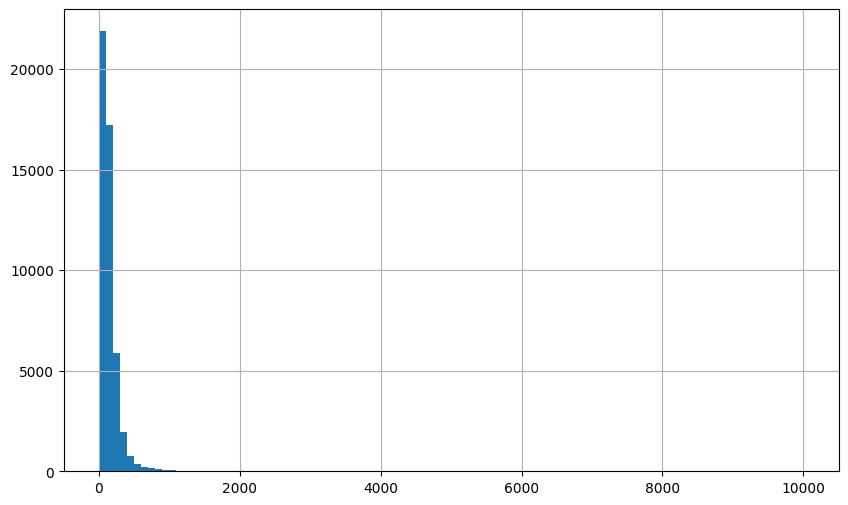

In [54]:
plt.figure(figsize=(10, 6))
airbnb['price'].hist(bins=100)

As we can see above, there are many outliers in `price` column.

There are outliers in `neighborhood_group` too. Manhattan and Brooklyn has significantly more data than Staten Island. This doesn’t count as an outlier, since Manhattan and Brooklyn has a higher housing density as compared to Staten Island.

## Identify Outliers Using Interquartile Range Method
The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

We can calculate the percentiles of a dataset using the percentile() NumPy function that takes the dataset and specification of the desired percentile. The IQR can then be calculated as the difference between the 75th and 25th percentiles.


In [55]:
# calculate interquartile range
q25, q75 = np.percentile(airbnb['price'], 25), np.percentile(airbnb['price'], 75)
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [data for data in airbnb['price'] if data < lower or data > upper]

## Drop Outliers

In [56]:
# remove outliers
outliers_removed = [data for data in airbnb['price'] if data > lower and data < upper]

outliers_removed is the array which contains prices without outliers. We can now assign this array of new values to the airbnb dataframe price column, by first converting it into Series by using pd.Series().

In [57]:
airbnb['price'] = pd.Series(outliers_removed)

Let's look at the plot of `price` again and analyze the distribution of the values.

<Axes: >

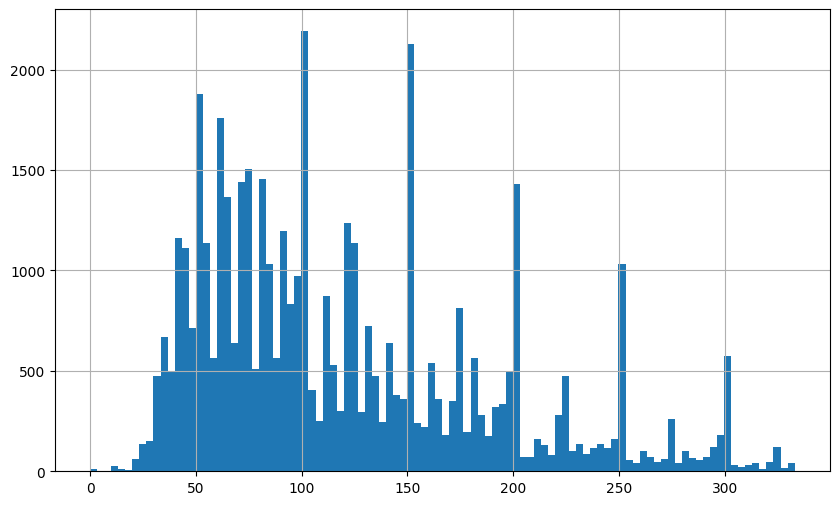

In [58]:
plt.figure(figsize=(10, 6))
airbnb['price'].hist(bins=100)

As we can see the plot above, we can draw a comparision between first plot (without removing outliers) and the one above. We see that the bars are fairly distributed across different price values instead of being scattered to just one value.

## Save the Data to Your Google Drive

In [62]:
airbnb.to_csv("/content/drive/MyDrive/IS723_2024S/airbnb_cleaned.csv")

Reference: https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45